In [19]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [21]:
df = pd.read_csv('stud.csv')

In [22]:
# Preparing X(independent) and Y(dependent) variables
x = df.drop(columns=['math score']) # features
y = df['math score'] # Target variables

In [23]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

- OneHotEncoder - It converts categorical data into a binary matrix.
- StandardScaler - Standardizes numerical data (mean=0, variance=1). It normalizes numerical features.
- ColumnTransformer - Applies different transformations to different columns.

In [24]:
# Converting categorical data into a numerical data format that machine learning models can process
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
x = preprocessor.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape, x_test.shape

((800, 19), (200, 19))

Create and evaluate function to give all metrics after model training

In [26]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    return mae, mse, rmse, r2

In [27]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()   
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Model Training
    
    # Make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 score: {:.4f}".format(model_train_r2))
    
    print('-'*40)
     
    print('Model performance for test set')
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*40)
    print('\n')

Linear Regression
Model performance for training set
- Mean Absolute Error: 4.2667
- Mean Squared Error: 28.3349
- Root Mean Squared Error: 5.3231
- R2 score: 0.8743
----------------------------------------
Model performance for test set
- Mean Absolute Error: 4.2148
- Mean Squared Error: 29.0952
- Root Mean Squared Error: 5.3940
- R2 score: 0.8804


Lasso
Model performance for training set
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- Root Mean Squared Error: 6.5938
- R2 score: 0.8071
----------------------------------------
Model performance for test set
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- Root Mean Squared Error: 6.5197
- R2 score: 0.8253


Ridge
Model performance for training set
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- Root Mean Squared Error: 5.3233
- R2 score: 0.8743
----------------------------------------
Model performance for test set
- Mean Absolute Error: 4.2111
- Mean Squared Error: 29.0563
- Root Mean Squared 

In [28]:
try:
    result = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score'])
    result = result.sort_values(by=['R2 Score'], ascending=False)
    print(result)
except Exception as ex:
    print('Error:', ex)

                Model Name  R2 Score
2                    Ridge  0.880593
0        Linear Regression  0.880433
7       CatBoost Regressor  0.851632
8       AdaBoost Regressor  0.850295
5  Random Forest Regressor  0.848638
6            XGB Regressor  0.827797
1                    Lasso  0.825320
3   K-Neighbours Regressor  0.783898
4            Decision Tree  0.740444


### Linear Regression

- x_train - We make prediction on x_train to check how well the model moemorized the training data. It's goal is to measure overfitting
- x_test - We make prediction on x_test to evaluate the model's generalization ability. It's goal is to check if the model worlds well on unseen data.

In [29]:
# fit_intercept parameter is used in regression models to determine whether the model should calculate an intercept(bias) or not
lin_model = LinearRegression(fit_intercept=True) 
lin_model = lin_model.fit(x_train, y_train)
y_predict = lin_model.predict(x_test)
score = r2_score(y_test, y_predict)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### Plot y_predict and y_test

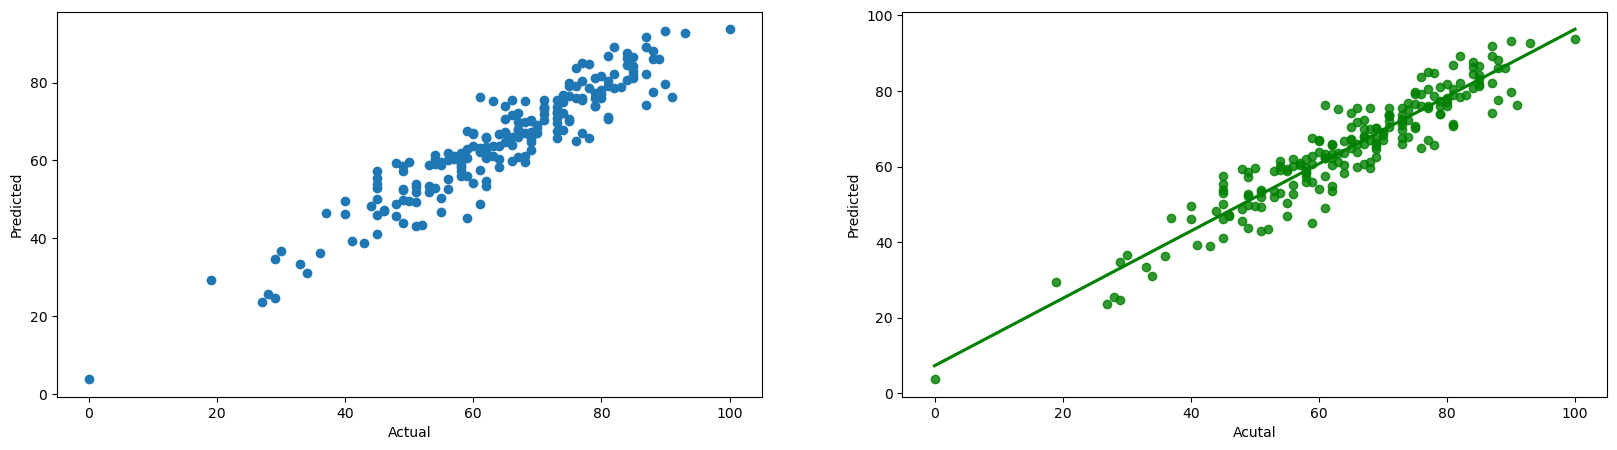

In [30]:
fig, axs = plt.subplots(1,2,figsize=(20,5))

plt.subplot(121)
plt.scatter(y_test, y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(122)
sns.regplot(x=y_test, y=y_predict, color='green', ci=None)
plt.xlabel('Acutal')
plt.ylabel('Predicted')
plt.show()

Difference between actual value and predicted value

In [31]:
# diff = pd.DataFrame(list(zip(y_test, y_predict, y_test-y_predict)), columns=['Acutal Value', 'Predicted Value', 'Difference'])
diff = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predict, 'Difference':y_test-y_predict})
print(diff)

     Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
..            ...              ...         ...
408            52        43.409149    8.590851
332            62        62.152214   -0.152214
208            74        67.888395    6.111605
613            65        67.022287   -2.022287
78             61        62.345132   -1.345132

[200 rows x 3 columns]
